<a href="https://colab.research.google.com/github/acastiblancol/Entrega_1/blob/main/eda_proy_CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA inicial Proyecto SIKA
MINE-4101: Applied Data Science
Univerisdad de los Andes

*Dataset:* Los datos actuales son los históricos de ventas de la empresa SIKA, los cuales abarcan 2 años de ventas de sus productos.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Cargue de datos

In [ ]:
# Load Excel sheets
sales_data = pd.read_excel('2. Forecast por Regional - Febrero 2023.xlsx', sheet_name='Resumen', skiprows=[0])
material_data = pd.read_excel('Origen.xlsx', sheet_name='Resumen_SGAN')
rain_data = pd.read_excel('Productos_precipitacion1.xlsx', sheet_name="Hoja1")

# Display the first few rows
print(sales_data.head())
print(material_data.head())
print(rain_data.head())

   SGAN Presentación  Peso Neto (kg)  Tipo Categoría   Regional  Agosto  \
0  S792           KG             1.0  FERT      YBLK   MEDELLÍN  752400   
1  S792           KG             1.0  FERT      YBLK       CALI       0   
2  S276           KG             1.0  FERT      YBLK       CALI  183900   
3  S276           KG             1.0  FERT      YBLK     BOGOTÁ  138600   
4  S276           KG             1.0  FERT      YBLK  SANTANDER   81750   

   Septiembre   Octubre  Noviembre  ...   Febrero     Marzo     Abril  \
0     1011300  926100.0     942900  ...  852050.0  852050.0  852050.0   
1           0       0.0      30000  ...   20000.0   20000.0   20000.0   
2      206220  162300.0     156000  ...  160735.0  160735.0  160735.0   
3      145500  166500.0     169500  ...  142950.0  142950.0  142950.0   
4       82200  115200.0     102300  ...   99260.0   99260.0   99260.0   

       Mayo  Target Market  Tipo ABC      Febrero.1        Marzo.1  \
0  852050.0      CONCRETE.         A  90

In [ ]:
df_VentahistoricoFEB2023 = pd.read_csv('./data/Marzo2023.csv', sep=';')
df_VentahistoricoAGO2023 = pd.read_csv('./data/Septiembre2023.csv', sep=';')
df_VentahistoricoFEB2024 = pd.read_csv('./data/Marzo2024.csv', sep=';')
df_VentahistoricoAGO2024 = pd.read_csv('./data/Septiembre2024.csv', sep=';')

##1.Entendimiento inicial de los datos:


In [ ]:
print(sales_data.describe())
print(sales_data.info())
print(material_data.describe())
print(material_data.info())
print(rain_data.info())
print(rain_data.describe())

       Peso Neto (kg)         Agosto    Septiembre        Octubre  \
count     3948.000000    3948.000000  3.948000e+03    3948.000000   
mean        30.792157    1965.464286  2.125030e+03    2092.614514   
std        107.435964   18191.267936  2.125401e+04   19802.723146   
min          0.001000  -24540.000000 -7.260000e+02    -207.000000   
25%          1.000000       0.000000  0.000000e+00       0.000000   
50%          5.678000      24.000000  2.400000e+01      18.000000   
75%         24.730000     258.000000  2.955000e+02     252.000000   
max       1587.000000  752400.000000  1.011300e+06  926100.000000   

           Noviembre      Diciembre          Enero        Febrero  \
count    3948.000000    3948.000000    3948.000000    3948.000000   
mean     2102.939210    1968.579027    1781.052432    2169.277444   
std     20708.998434   17541.319537   18230.958268   19644.828218   
min      -600.000000   -1620.000000   -8100.000000   -1350.000000   
25%         0.000000       0.0000

In [ ]:
# Ver primer dataFrame histórico ventas
print(df_VentahistoricoFEB2023.head())

   SGAN Presentación Peso Neto (kg)  Tipo Categoría   Regional     sep-22  \
0  S792           KG              1  FERT      YBLK   MEDELLÍN  1.011.300   
1  S792           KG              1  FERT      YBLK       CALI          0   
2  S276           KG              1  FERT      YBLK       CALI    206.220   
3  S276           KG              1  FERT      YBLK     BOGOTÁ    145.500   
4  S276           KG              1  FERT      YBLK  SANTANDER     82.200   

   oct-22  nov-22  dic-22  ...    Marzo    Abril     Mayo    Junio  \
0   926.1   942.9  615.90  ...  858.850  858.850  858.850  858.850   
1     0.0    30.0    0.00  ...   10.000   10.000   10.000   10.000   
2   162.3   156.0  149.49  ...  153.180  153.180  153.180  153.180   
3   166.5   169.5  145.50  ...  139.250  139.250  139.250  139.250   
4   115.2   102.3  120.00  ...   98.105   98.105   98.105   98.105   

   Target Market  Tipo ABC  Marzo.1  Abril.1   Mayo.1  Junio.1  
0      CONCRETE.         A  840.000  840.000  840.0

### Limpieza de Datos

In [ ]:
#Limpieza columnas semestre de Agosto 2022 Enero 2023
df_VentahistoricoFEB2023.drop(columns=['Marzo', 'Abril', 'Mayo', 'Junio', 'Marzo.1', 'Abril.1', 'Mayo.1', 'Junio.1'], inplace=True, errors='ignore')
print(df_VentahistoricoFEB2023.head())
# limpieza daros de Agosto 2023 a Enero 2024
df_VentahistoricoFEB2024.drop(columns=['Marzo', 'Abril', 'Mayo', 'Junio', 'Marzo.1', 'Abril.1', 'Mayo.1', 'Junio.1'], inplace=True, errors='ignore')
print(df_VentahistoricoFEB2024.head())
#Limpieza da datos Febrero 2023 a Julio 2023
df_VentahistoricoAGO2023.drop(columns=['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Septiembre.1', 'Octubre.1', 'Noviembre.1', 'Diciembre.1'], inplace=True, errors='ignore')
print(df_VentahistoricoAGO2023.head())
#Limpieza da datos Febrero 2024 a Julio 2024
df_VentahistoricoAGO2024.drop(columns=['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Septiembre.1', 'Octubre.1', 'Noviembre.1', 'Diciembre.1'], inplace=True, errors='ignore')
print(df_VentahistoricoAGO2024.head())

   SGAN Presentación Peso Neto (kg)  Tipo Categoría   Regional     sep-22  \
0  S792           KG              1  FERT      YBLK   MEDELLÍN  1.011.300   
1  S792           KG              1  FERT      YBLK       CALI          0   
2  S276           KG              1  FERT      YBLK       CALI    206.220   
3  S276           KG              1  FERT      YBLK     BOGOTÁ    145.500   
4  S276           KG              1  FERT      YBLK  SANTANDER     82.200   

   oct-22  nov-22  dic-22  ene-23  feb-23 Target Market Tipo ABC  
0   926.1   942.9  615.90  863.70  793.20     CONCRETE.        A  
1     0.0    30.0    0.00   30.00    0.00     CONCRETE.        A  
2   162.3   156.0  149.49  106.50  138.57     CONCRETE.        A  
3   166.5   169.5  145.50   92.10  116.40     CONCRETE.        A  
4   115.2   102.3  120.00   75.48   93.45     CONCRETE.        A  
   SGAN Presentación Peso Neto (kg)  Tipo Categoría      Regional  sep-23  \
0  S792           KG              1  FERT      YBLK      M

In [ ]:
# Función que elimina columnas repetidas
def drop_duplicate_columns(df, merge_key):
    all_columns = df.columns.tolist()
    columns_to_compare = [col for col in all_columns if col not in merge_key]

    columns_x = [col for col in columns_to_compare if col.endswith('_x')]
    columns_y = [col for col in columns_to_compare if col.endswith('_y')]

    columns_to_drop = []
    for col_x in columns_x:
        base_name = col_x[:-2]
        col_y = f"{base_name}_y"
        if col_y in columns_y:
            columns_to_drop.append(col_y)

    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    df.rename(columns={col: col[:-2] for col in columns_x}, inplace=True)

    return df

In [ ]:
merged_df = pd.merge(df_VentahistoricoFEB2024, df_VentahistoricoFEB2023, on=['SGAN', 'Regional'], how='outer')
merged_df = drop_duplicate_columns(merged_df, ['SGAN', 'Regional'])
merged_df = pd.merge(merged_df, df_VentahistoricoAGO2023, on=['SGAN', 'Regional'], how='outer')
merged_df = drop_duplicate_columns(merged_df, ['SGAN', 'Regional'])
merged_df = pd.merge(merged_df, df_VentahistoricoAGO2024, on=['SGAN', 'Regional'], how='outer')
merged_df = drop_duplicate_columns(merged_df, ['SGAN', 'Regional'])
print(merged_df.head())

    SGAN Presentación Peso Neto (kg)  Tipo Categoría      Regional   sep-23  \
0  S1001           PC         21,955  FERT      NORM       PEREIRA    0.000   
1  S1009           PC             25  FERT      NORM  BARRANQUILLA  495.000   
2  S1009           PC             25  FERT      NORM        BOGOTÁ    1.296   
3  S1009           PC             25  FERT      NORM          CALI  168.000   
4  S1009           PC             25  FERT      NORM      MEDELLÍN    0.000   

    oct-23   nov-23  dic-23  ...   may-23  jun-23   jul-23   ago-23   mar-24  \
0    0.000    0.000     0.0  ...      NaN     NaN      NaN      NaN      NaN   
1  270.000  735.000   447.0  ...  384.000   333.0  531.000  474.000  450.000   
2    1.983    1.989   885.0  ...    1.191   900.0    1.395    1.734    1.278   
3  648.000  252.000   327.0  ...  255.000   630.0  174.000  129.000  708.000   
4    0.000  300.000     0.0  ...   48.000     0.0   30.000    0.000    0.000   

    abr-24   may-24  jun-24   jul-24  ago-24

##2. Análisis univariado

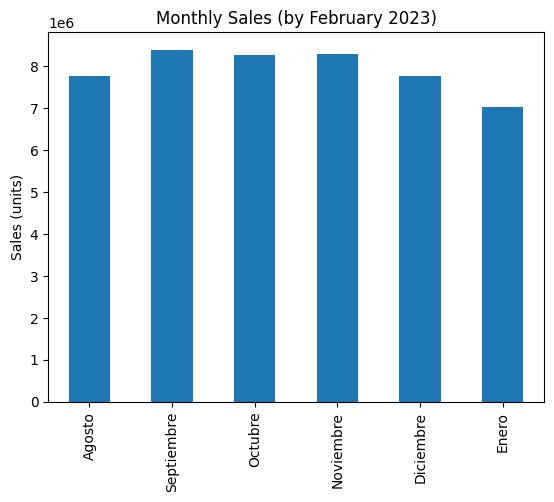

In [ ]:
# Plot monthly sales
monthly_sales = sales_data[['Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero']].sum()
monthly_sales.plot(kind='bar', title="Monthly Sales (by February 2023)")
plt.ylabel('Sales (units)')
plt.show()

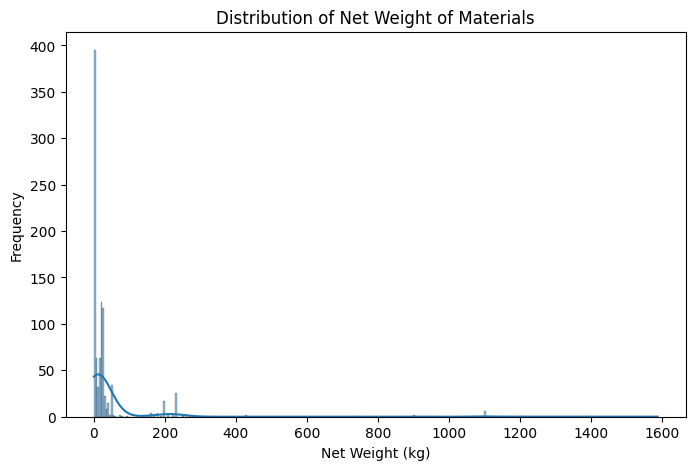

In [ ]:
# Distribution of net weight
plt.figure(figsize=(8, 5))
sns.histplot(material_data['Peso Neto (kg)'], kde=True)
plt.title("Distribution of Net Weight of Materials")
plt.xlabel("Net Weight (kg)")
plt.ylabel("Frequency")
plt.show()

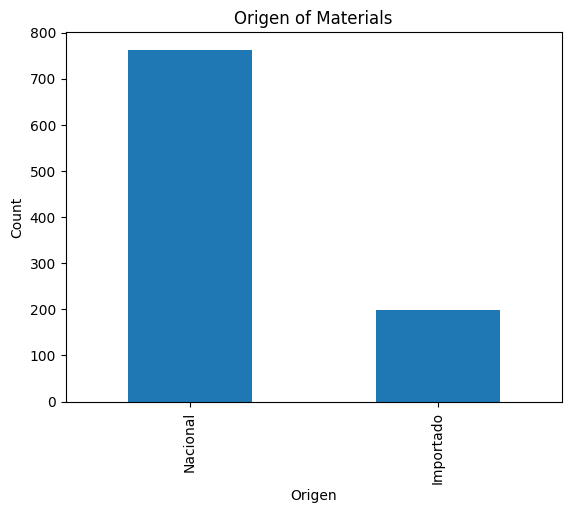

In [ ]:
# Material frequency
material_counts = material_data['Origen'].value_counts()
material_counts.plot(kind='bar', title="Origen of Materials")
plt.ylabel('Count')
plt.show()

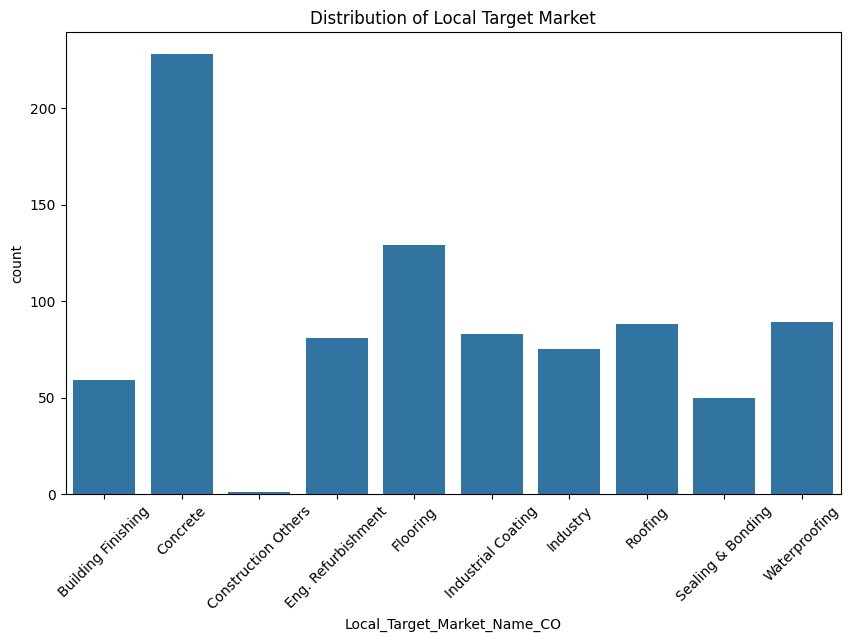

In [ ]:
# Count plot for target market
plt.figure(figsize=(10, 6))
sns.countplot(data=rain_data, x='Local_Target_Market_Name_CO')
plt.title("Distribution of Local Target Market")
plt.xticks(rotation=45)
plt.show()

In [ ]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()
merged_df['Promedio_Mensual'] = merged_df[numerical_cols].mean(axis=1)
print(merged_df.head())

    SGAN Presentación Peso Neto (kg)  Tipo Categoría      Regional   sep-23  \
0  S1001           PC         21,955  FERT      NORM       PEREIRA    0.000   
1  S1009           PC             25  FERT      NORM  BARRANQUILLA  495.000   
2  S1009           PC             25  FERT      NORM        BOGOTÁ    1.296   
3  S1009           PC             25  FERT      NORM          CALI  168.000   
4  S1009           PC             25  FERT      NORM      MEDELLÍN    0.000   

    oct-23   nov-23  dic-23  ...  jun-23   jul-23   ago-23   mar-24   abr-24  \
0    0.000    0.000     0.0  ...     NaN      NaN      NaN      NaN      NaN   
1  270.000  735.000   447.0  ...   333.0  531.000  474.000  450.000  309.000   
2    1.983    1.989   885.0  ...   900.0    1.395    1.734    1.278    1.263   
3  648.000  252.000   327.0  ...   630.0  174.000  129.000  708.000  465.000   
4    0.000  300.000     0.0  ...     0.0   30.000    0.000    0.000   12.000   

    may-24  jun-24   jul-24  ago-24  Promedi

##3. Análisis bivariado

In [ ]:
# Agrupar por 'Regional' y 'SGAN' y obtener los 10 productos con el promedio mensual más alto en cada regional
top_10_products_by_regional = merged_df.groupby(['Regional']) \
    .apply(lambda x: x.nlargest(10, 'Promedio_Mensual')) \
    .reset_index(drop=True)

top_10_products_by_regional

<ipython-input-55-06876e87a74a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Promedio_Mensual')) \


,SGAN,Presentación,Peso Neto (kg),Tipo,Categoría,Regional,sep-23,oct-23,nov-23,dic-23,...,jun-23,jul-23,ago-23,mar-24,abr-24,may-24,jun-24,jul-24,ago-24,Promedio_Mensual
0,S4235,PC,3,FERT,ERLA,BARRANQUILLA,816.000,648.0,870.000,387.000,...,690.0,786.0,705.0,528.0,651.0,882.0,600.0,990.0,747.0,674.784000
1,S4226,PC,"0,5",FERT,ERLA,BARRANQUILLA,771.000,486.0,1.224,756.000,...,804.0,825.0,468.0,792.0,798.0,945.0,747.0,909.0,597.0,673.928087
2,S4128,PC,20,FERT,NORM,BARRANQUILLA,480.000,405.0,594.000,627.000,...,567.0,456.0,759.0,732.0,612.0,849.0,723.0,621.0,519.0,599.443304
3,S2825,PC,"2,3",FERT,NORM,BARRANQUILLA,741.000,939.0,969.000,1.008,...,828.0,648.0,918.0,828.0,726.0,258.0,144.0,402.0,144.0,595.786435
4,S4119,PC,5,FERT,NORM,BARRANQUILLA,798.000,540.0,1.086,720.000,...,540.0,495.0,939.0,780.0,219.0,414.0,360.0,450.0,297.0,522.411913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,S4161,PC,25,FERT,NORM,SANTANDER,0.000,786.0,0.000,402.000,...,90.0,0.0,0.0,600.0,600.0,0.0,0.0,600.0,525.0,256.826087
66,S2871,PC,20,FERT,NORM,SANTANDER,0.000,51.0,60.000,0.000,...,960.0,24.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,244.071000
67,S4154,PC,30,FERT,NORM,SANTANDER,1.335,411.0,12.000,351.000,...,225.0,48.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,235.931609
68,S880,PC,27,FERT,NORM,SANTANDER,540.000,0.0,0.000,0.000,...,600.0,-3.0,0.0,0.0,0.0,480.0,0.0,0.0,0.0,224.869565


<ipython-input-56-fe87a31f87c6>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Promedio_Mensual')) \


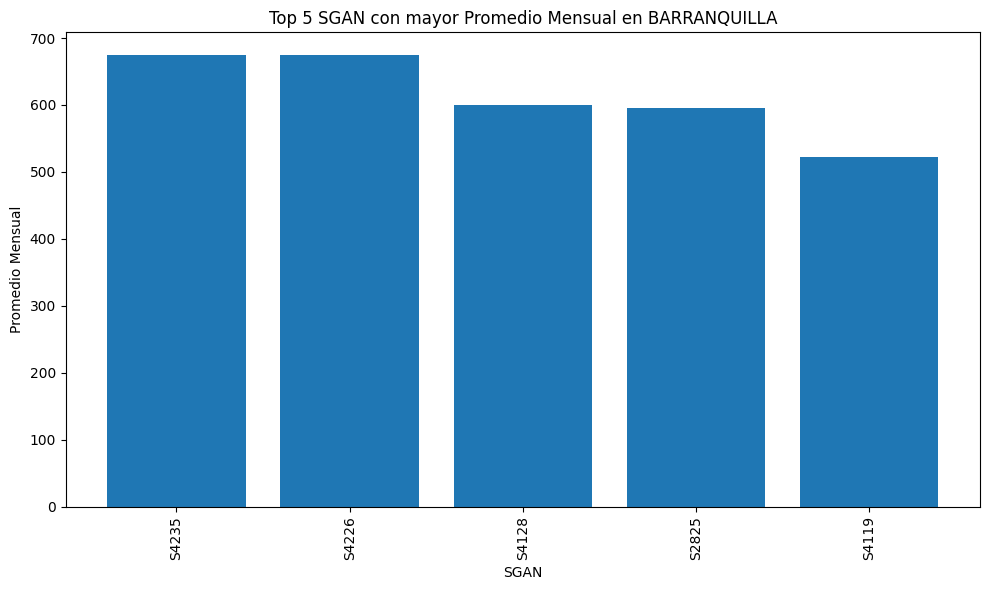

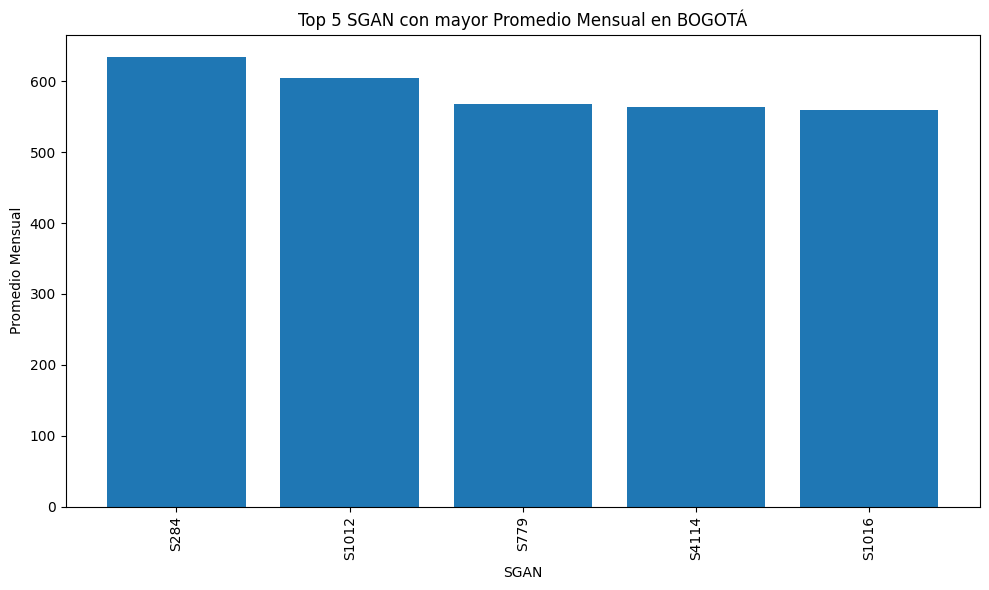

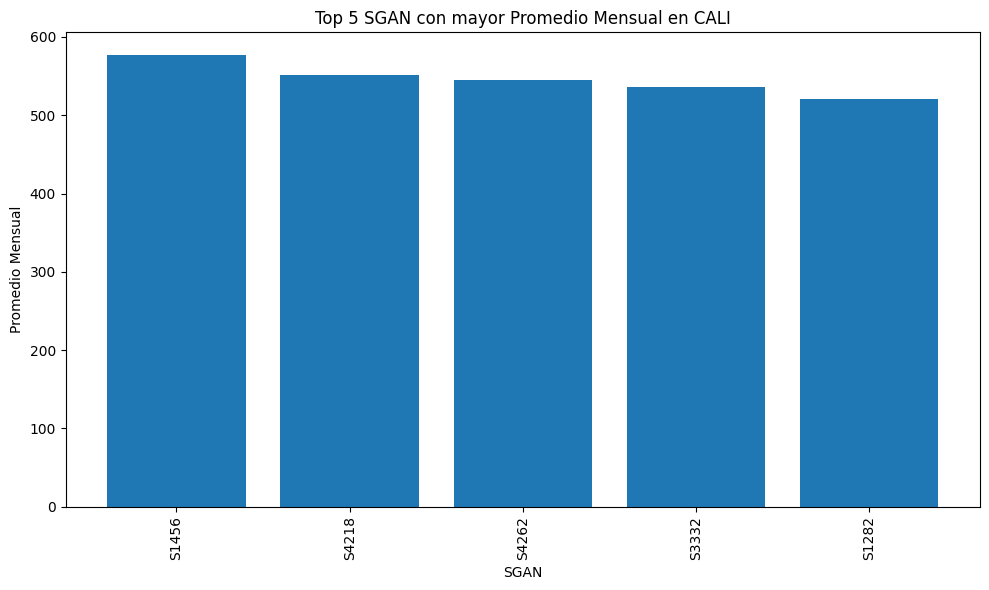

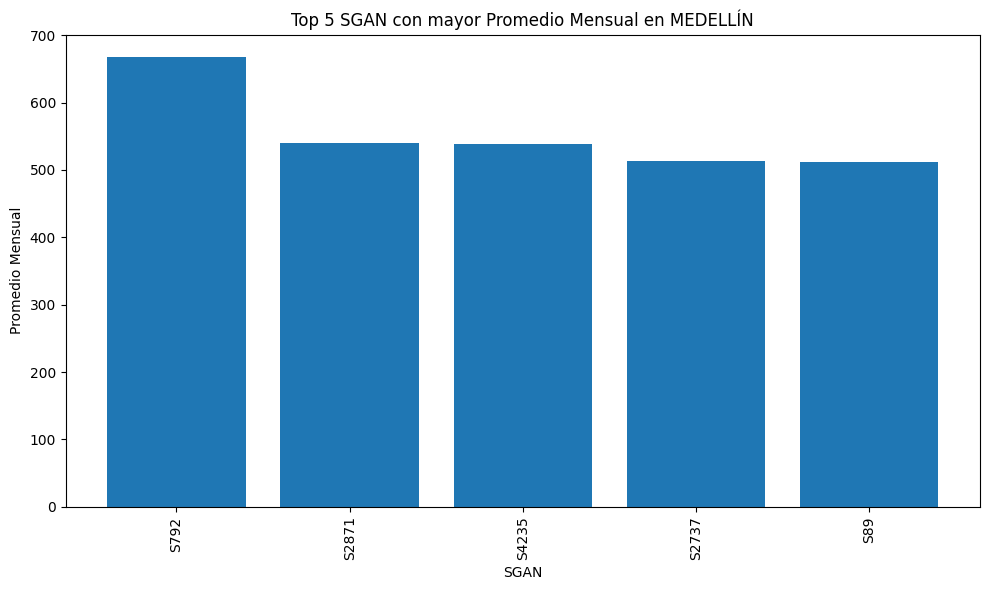

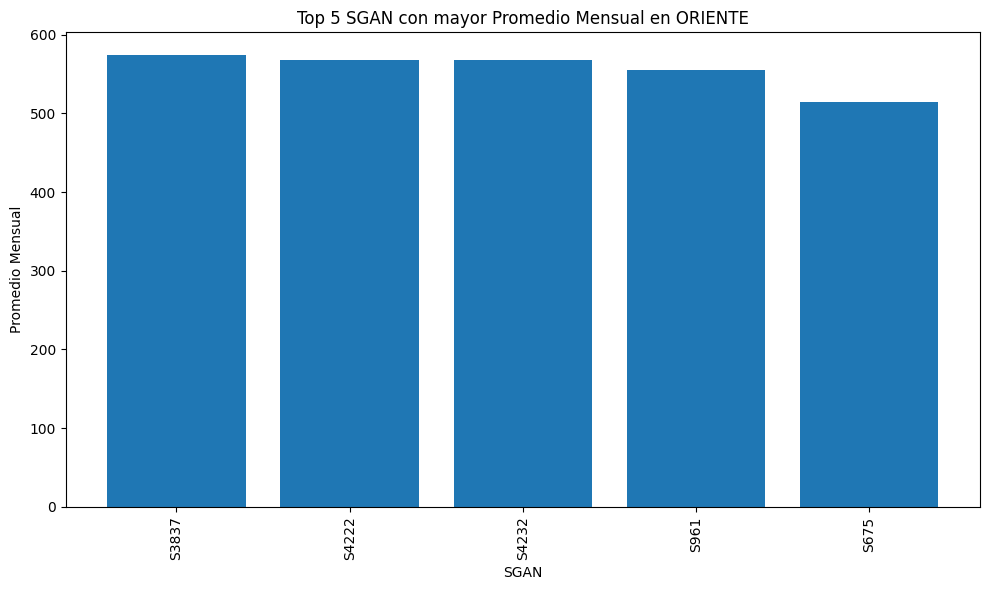

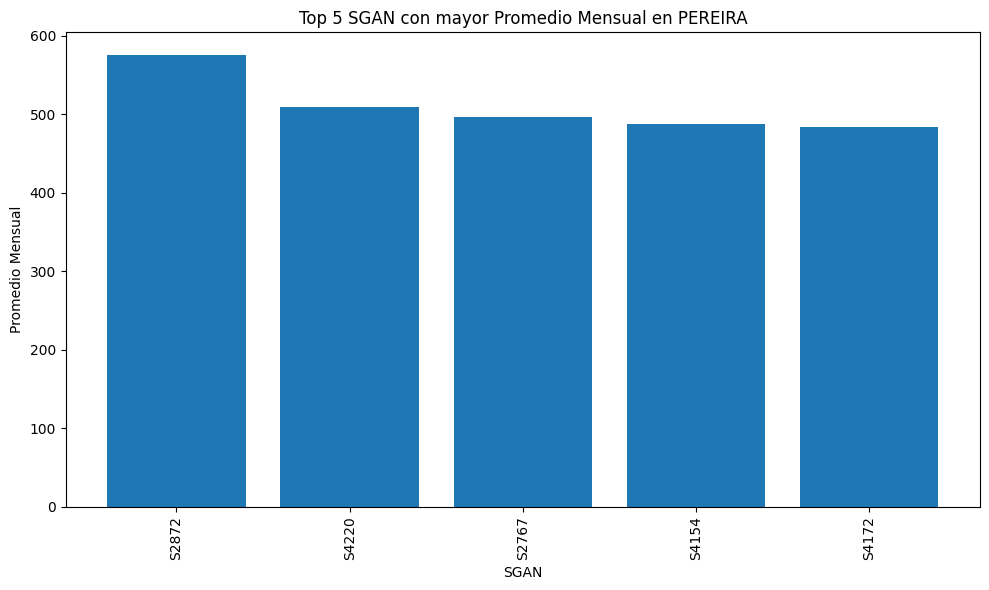

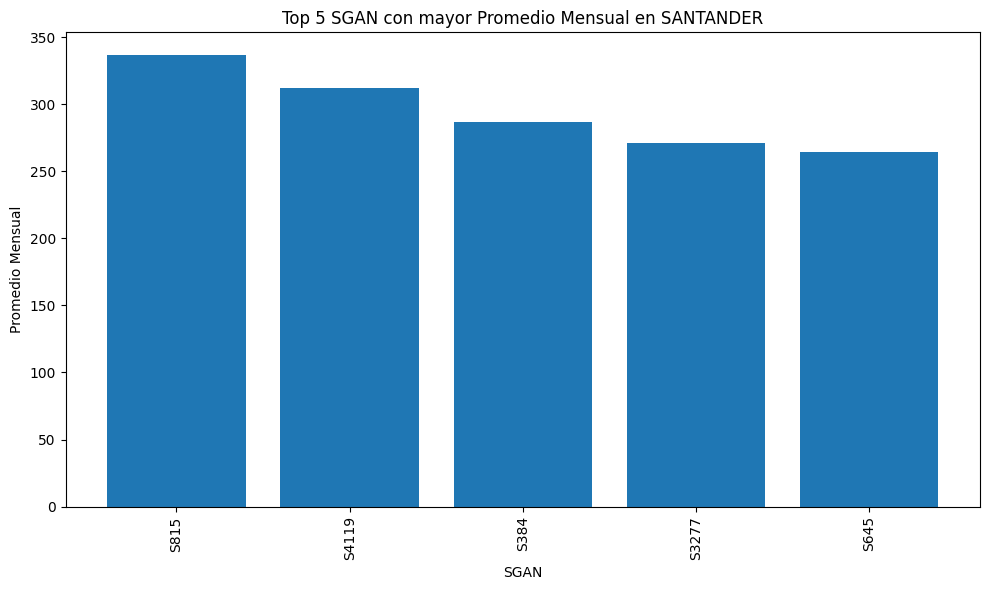

In [ ]:
# Agrupar por 'Regional' y 'SGAN' y obtener los 5 productos con el promedio mensual más alto en cada regional
top_5_products_by_regional = merged_df.groupby(['Regional']) \
    .apply(lambda x: x.nlargest(5, 'Promedio_Mensual')) \
    .reset_index(drop=True)

# Obtener las regiones únicas
regiones = top_5_products_by_regional['Regional'].unique()

# Iterar a través de las regiones y generar una gráfica para cada una
for region in regiones:
  df_region = top_5_products_by_regional[top_5_products_by_regional['Regional'] == region]

  plt.figure(figsize=(10, 6))
  plt.bar(df_region['SGAN'], df_region['Promedio_Mensual'])
  plt.xlabel('SGAN')
  plt.ylabel('Promedio Mensual')
  plt.title(f'Top 5 SGAN con mayor Promedio Mensual en {region}')
  plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
  plt.tight_layout()
  plt.show()

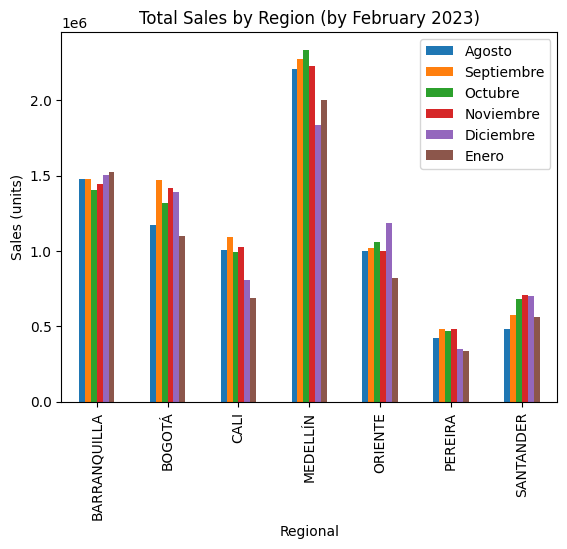

In [ ]:
# Total sales by region
region_sales = sales_data.groupby('Regional')[['Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero']].sum()
region_sales.plot(kind='bar', title="Total Sales by Region (by February 2023)")
plt.ylabel('Sales (units)')
plt.show()

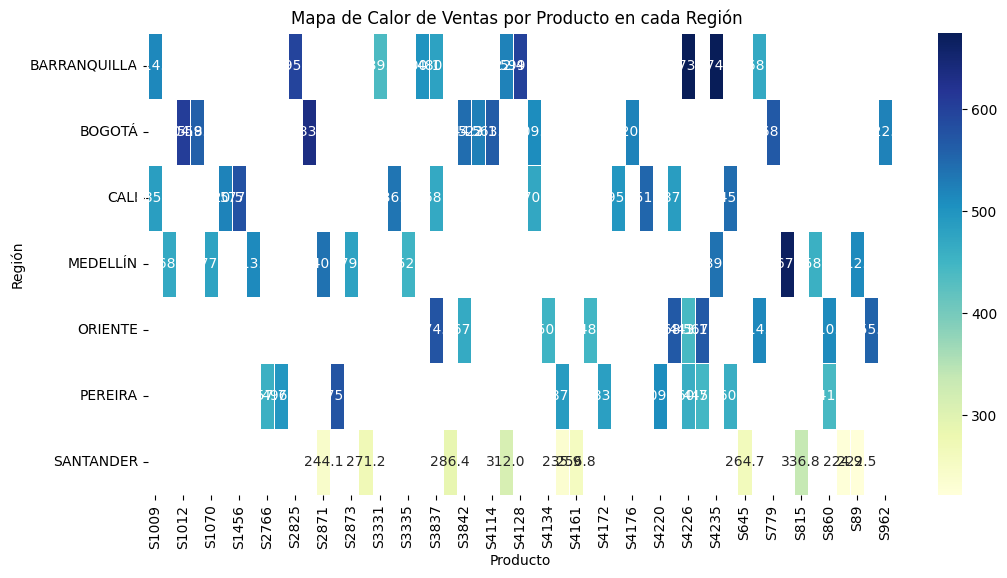

In [ ]:
# Agrupa ventas por Región y Mes
ventas_por_region = top_10_products_by_regional.groupby(['Regional', 'SGAN']).sum()['Promedio_Mensual'].unstack()

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea el mapa de calor
sns.heatmap(ventas_por_region, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor de Ventas por Producto en cada Región ")
plt.xlabel("Producto")
plt.ylabel("Región")
plt.show()


In [ ]:
#Comparación de origen de insumos para los productos
top_origen = pd.merge(merged_df, material_data[['Material', 'Origen']], left_on='SGAN', right_on='Material', how='left')

top_origen = top_origen.drop(columns=['Material'], errors='ignore')
print(top_origen.head())

    SGAN Presentación Peso Neto (kg)  Tipo Categoría      Regional   sep-23  \
0  S1001           PC         21,955  FERT      NORM       PEREIRA    0.000   
1  S1009           PC             25  FERT      NORM  BARRANQUILLA  495.000   
2  S1009           PC             25  FERT      NORM        BOGOTÁ    1.296   
3  S1009           PC             25  FERT      NORM          CALI  168.000   
4  S1009           PC             25  FERT      NORM      MEDELLÍN    0.000   

    oct-23   nov-23  dic-23  ...   jul-23   ago-23   mar-24   abr-24   may-24  \
0    0.000    0.000     0.0  ...      NaN      NaN      NaN      NaN      NaN   
1  270.000  735.000   447.0  ...  531.000  474.000  450.000  309.000  600.000   
2    1.983    1.989   885.0  ...    1.395    1.734    1.278    1.263    1.158   
3  648.000  252.000   327.0  ...  174.000  129.000  708.000  465.000  447.000   
4    0.000  300.000     0.0  ...   30.000    0.000    0.000   12.000    0.000   

   jun-24   jul-24  ago-24  Promedio_M

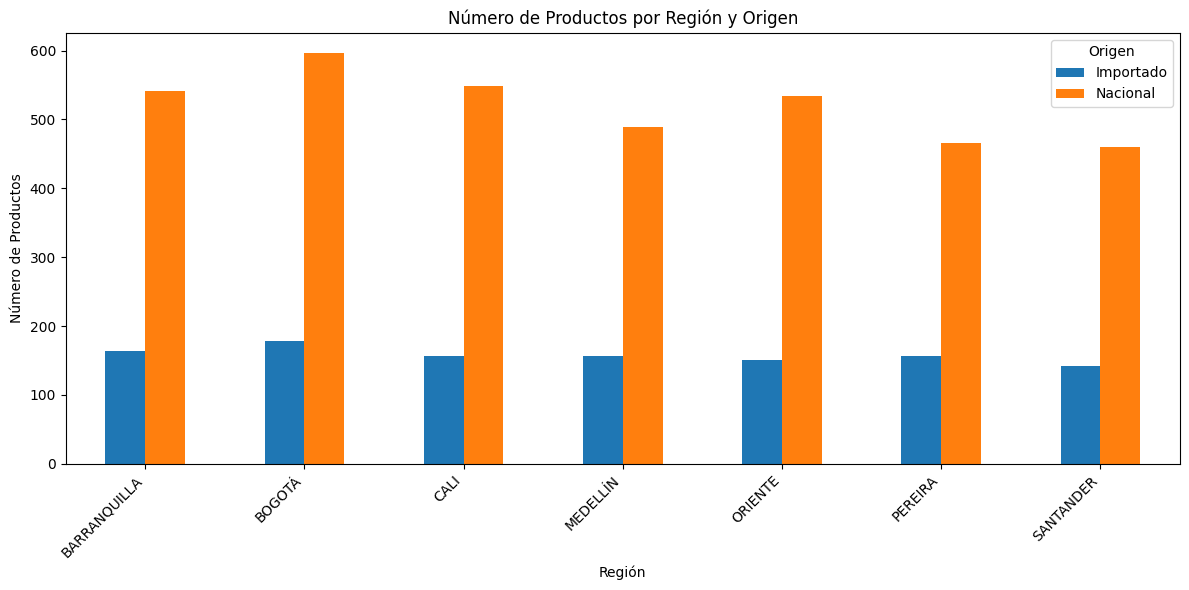

In [ ]:
# prompt: graficar por regional el numero de producos Nacional o importado en barras

# ... (Your existing code)

# Group by 'Regional' and 'Origen' and count the number of products
product_counts_by_region_origen = top_origen.groupby(['Regional', 'Origen'])['SGAN'].count().unstack()

# Plot the bar chart
product_counts_by_region_origen.plot(kind='bar', figsize=(12, 6))
plt.title('Número de Productos por Región y Origen')
plt.xlabel('Región')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Origen')
plt.tight_layout()
plt.show()

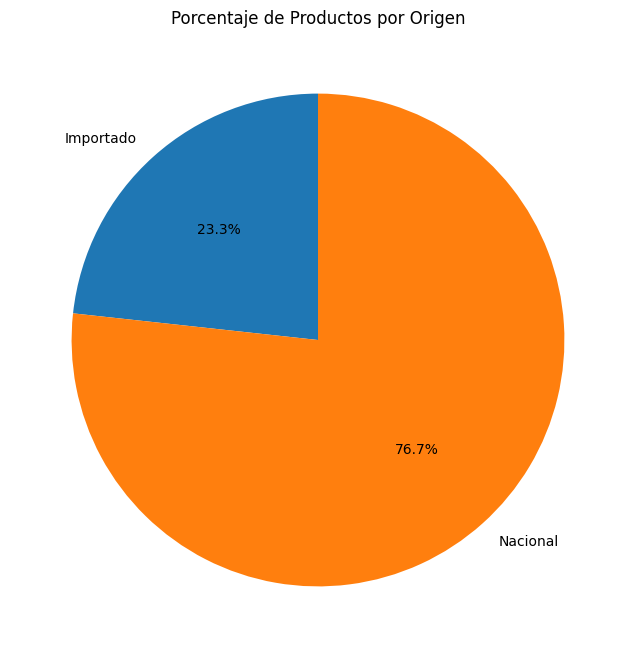

In [ ]:

total_products_by_origin = top_origen.groupby('Origen')['SGAN'].count()

percentage_by_origin = (total_products_by_origin / top_origen.shape[0]) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_by_origin, labels=percentage_by_origin.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Productos por Origen')
plt.show()

In [ ]:
#leer archivos de productos de presipitación y producots de Historico de facturación

df_prod_lluvia = pd.read_csv('Productos_precipitacion1.csv', sep=';')
df_Historico = pd.read_csv('Historico_facturacion.csv', sep=';')

<ipython-input-41-8571235d34fa>:4: DtypeWarning: Columns (8,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Historico = pd.read_csv('Historico_facturacion.csv', sep=';')


In [ ]:
df_ProdLluvia_final = pd.merge(df_prod_lluvia, df_Historico[['Material', 'Product_Hierarchy']], on='Product_Hierarchy', how='inner')
df_ProdLluvia_final

,Local_Target_Market_Name_CO,Application_Field_Name,SubApplication_Field_Name,Product_Hierarchy,Agua,Material
0,Building Finishing,Interior walls,Interior wall levell,2.184010e+16,No,S645
1,Building Finishing,Interior walls,Interior wall levell,2.184010e+16,No,S645
2,Building Finishing,Interior walls,Interior wall levell,2.184010e+16,No,S645
3,Building Finishing,Interior walls,Interior wall levell,2.184010e+16,No,S645
4,Building Finishing,Interior walls,Interior wall levell,2.184010e+16,No,S645
...,...,...,...,...,...,...
61655,Waterproofing,Waterproofing mortar,Ready to use waterpr,2.070101e+16,No,S614
61656,Waterproofing,Waterproofing mortar,Ready to use waterpr,2.070101e+16,No,S614
61657,Waterproofing,Waterproofing mortar,Ready to use waterpr,2.070101e+16,No,S614
61658,Waterproofing,Waterproofing mortar,Ready to use waterpr,2.070101e+16,No,S614


In [ ]:

new_df = merged_df.copy()
new_df = pd.merge(new_df, df_ProdLluvia_final, left_on='SGAN', right_on='Material', how='inner')
new_df = new_df.drop(columns=['_merge'], errors='ignore')
print(new_df.head())

    SGAN Presentación Peso Neto (kg)  Tipo Categoría      Regional  sep-23  \
0  S1009           PC             25  FERT      NORM  BARRANQUILLA   495.0   
1  S1009           PC             25  FERT      NORM  BARRANQUILLA   495.0   
2  S1009           PC             25  FERT      NORM  BARRANQUILLA   495.0   
3  S1009           PC             25  FERT      NORM  BARRANQUILLA   495.0   
4  S1009           PC             25  FERT      NORM  BARRANQUILLA   495.0   

   oct-23  nov-23  dic-23  ...  jun-24  jul-24 ago-24 Promedio_Mensual  \
0   270.0   735.0   447.0  ...   810.0   762.0  633.0       514.531174   
1   270.0   735.0   447.0  ...   810.0   762.0  633.0       514.531174   
2   270.0   735.0   447.0  ...   810.0   762.0  633.0       514.531174   
3   270.0   735.0   447.0  ...   810.0   762.0  633.0       514.531174   
4   270.0   735.0   447.0  ...   810.0   762.0  633.0       514.531174   

  Local_Target_Market_Name_CO  Application_Field_Name  \
0               Waterproofing

In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(new_df['Agua'], new_df['Promedio_Mensual'])

# Aplicar la prueba Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

# Evaluar el resultado
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Rechazamos la hipótesis nula: hay una asociación significativa entre el Prmedio Mensual de Ventas y el Clima (invierno).")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que hay una asociación.")

Chi-cuadrado: 1067440.6369913141
Valor p: 0.0
Grados de libertad: 5396
Frecuencias esperadas:
 [[9.58509603e-02 8.38695903e-02 1.19813700e-02 ... 6.07455461e+00
  7.68005819e+00 3.24695128e+00]
 [1.76627143e-01 1.54548750e-01 2.20783928e-02 ... 1.11937452e+01
  1.41522498e+01 5.98324445e+00]
 [5.68215853e+00 4.97188872e+00 7.10269817e-01 ... 3.60106797e+02
  4.55282952e+02 1.92483120e+02]
 [1.02484657e-02 8.96740750e-03 1.28105821e-03 ... 6.49496514e-01
  8.21158315e-01 3.47166776e-01]
 [2.03511490e+00 1.78072554e+00 2.54389362e-01 ... 1.28975407e+02
  1.63063581e+02 6.89395172e+01]]
Rechazamos la hipótesis nula: hay una asociación significativa entre el Prmedio Mensual de Ventas y el Clima (invierno).


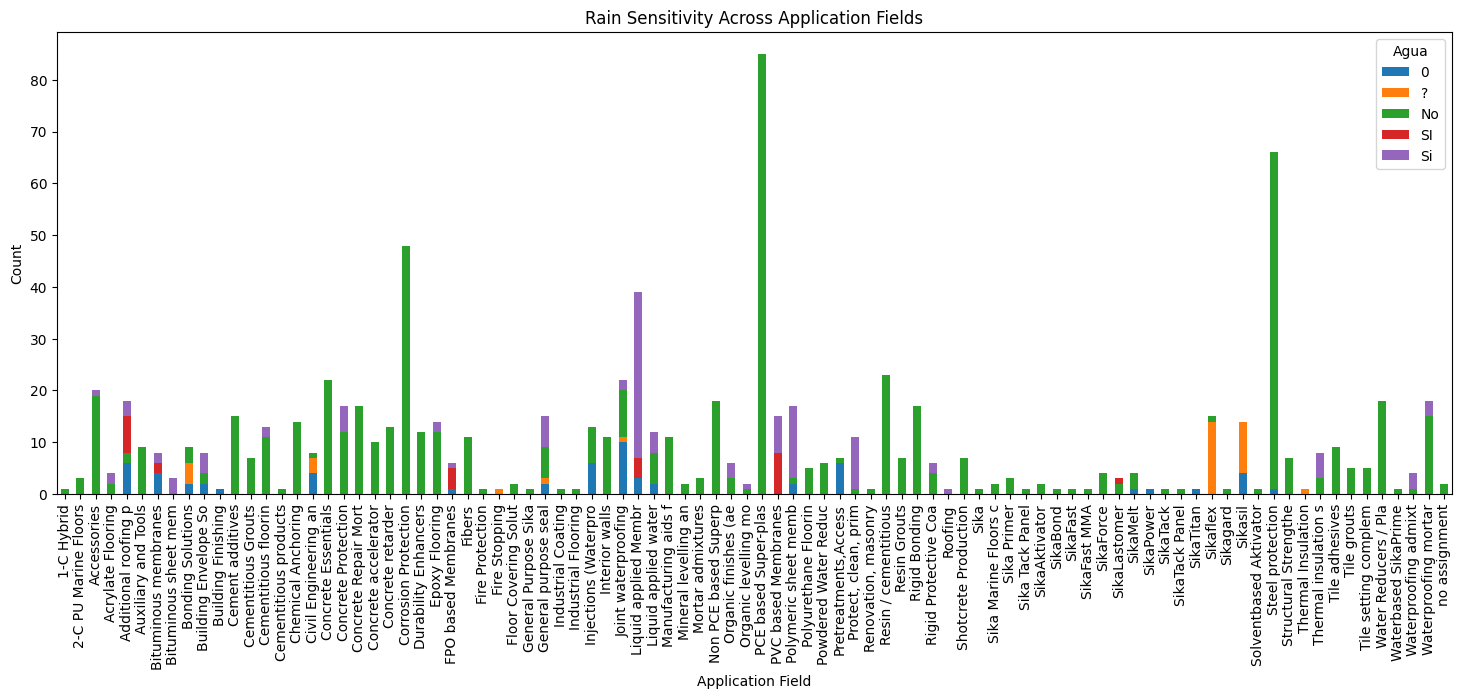

In [ ]:
# Cross-tabulation for application field and rain sensitivity
cross_tab = pd.crosstab(rain_data['Application_Field_Name'], rain_data['Agua'])
cross_tab.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title("Rain Sensitivity Across Application Fields")
plt.xlabel("Application Field")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()